
This script explores the overlap among outlier loci identification methods used in PE3



In [ ]:
setwd("~/Dropbox/U Chicago/Projects/France/DataAnalysis_Figures/PE3_DataAnalysis/")

library(tidyr)
library(VennDiagram)
library(ggplot2)
library(RVAideMemoire)
library(Rmisc)
library(stringi)
library(rowr)
library(ggforce)
library(plyr)

In [ ]:
#Read in PoPoolation generated data frame of outlier loci
pop_3 <- read.csv("./PoPoolation/PoPoolation_outliers_3.csv")


emb_d6high_3 <- pop_3$Embr_D6High_3
emb_d6high_3 <- na.omit(emb_d6high_3)
emb_d6low_3 <- pop_3$Embr_D6Low_3
emb_d6low_3 <- na.omit(emb_d6low_3)
d6high_low_3 <- pop_3$D6High_Low_3
d6high_low_3 <- na.omit(d6high_low_3)
d6size_high_3 <- pop_3$D6Size_High_3
d6size_high_3 <- na.omit(d6size_high_3)
d6size_low_3 <- pop_3$D6Size_Low_3
d6size_low_3 <- na.omit(d6size_low_3)
emb_d25high_3 <- pop_3$Emb_D25_High_3
emb_d25high_3 <- na.omit(emb_d25high_3)
emb_d25low_3 <- pop_3$Emb_D25_Low_3
emb_d25low_3 <- na.omit(emb_d25low_3)
emb_settledhigh_3 <- pop_3$Emb_Settled_high_3
emb_settledhigh_3 <- na.omit(emb_settledhigh_3)
emb_settledlow_3 <- pop_3$Emb_Settled_low_3
emb_settledlow_3 <- na.omit(emb_settledlow_3)

#Length of outlier loci lists
length(emb_d6high_3) #366
length(emb_d6low_3) #299
length(d6high_low_3) #248
length(d6size_high_3) #963
length(d6size_low_3) #848
length(emb_d25high_3) #3597
length(emb_d25low_3) #3053
length(emb_settledhigh_3) #2615
length(emb_settledlow_3) #4309




In [ ]:
#Overlap between treatments within days (scaled to shorter outlier list)
length(intersect(emb_d6high_3, emb_d6low_3))/length(emb_d6low_3) #40 percent overlap
length(intersect(emb_d25high_3, emb_d25low_3))/length(emb_d25low_3) #56% overlap
length(intersect(emb_settledhigh_3, emb_settledlow_3))/length(emb_settledlow_3) #38%

length(intersect(d6size_high_3, d6size_low_3))/length(d6size_low_3) #19% overlap


length(intersect(emb_d25high_3, emb_d25low_3))/length(emb_d25low_3)
length(intersect(emb_settledhigh_3, emb_settledlow_3))/length(emb_settledlow_3)




#Generate pH unique outlier lists
low_d6_unique <- setdiff(emb_d6low_3, emb_d6high_3) 
high_d6_unique <- setdiff(emb_d6high_3, emb_d6low_3)

length(intersect(d6size_high_3, d6size_low_3))/length(d6size_low_3)



In [ ]:
##Now looking at overlap of genes
#Generating lists of genes (removing SNP id)
emb_d6high_3 <- as.data.frame(emb_d6high_3)
emb_d6high_3 <- ((separate(emb_d6high_3, col = emb_d6high_3, into = c("Gene", "Position"), sep = "_(?=[:digit:])")))
emb_d6high_3_genes <- subset(emb_d6high_3, !duplicated(emb_d6high_3$Gene))
emb_d6high_3_genes <- as.data.frame(emb_d6high_3_genes[,-2])
colnames(emb_d6high_3_genes) <- "Gene_ID"
emb_d6high_3_genes <- as.data.frame(gsub("Contig", ".Contig", emb_d6high_3_genes$Gene_ID))
colnames(emb_d6high_3_genes) <- "Gene_ID"
write.csv(emb_d6high_3_genes, "./Outlier_GO/OutlierLists/emb_d6high_3_genes.csv")

emb_d6low_3 <- as.data.frame(emb_d6low_3)
emb_d6low_3 <- ((separate(emb_d6low_3, col = emb_d6low_3, into = c("Gene", "Position"), sep = "_(?=[:digit:])")))
emb_d6low_3_genes <- subset(emb_d6low_3, !duplicated(emb_d6low_3$Gene))
emb_d6low_3_genes <- as.data.frame(emb_d6low_3_genes[,-2])
colnames(emb_d6low_3_genes) <- "Gene_ID"
emb_d6low_3_genes <- as.data.frame(gsub("Contig", ".Contig", emb_d6low_3_genes$Gene_ID))
colnames(emb_d6low_3_genes) <- "Gene_ID"
write.csv(emb_d6low_3_genes, "./Outlier_GO/OutlierLists/emb_d6low_3_genes.csv")


d6high_low_3 <- as.data.frame(d6high_low_3)
d6high_low_3 <- ((separate(d6high_low_3, col = d6high_low_3, into = c("Gene", "Position"), sep = "_(?=[:digit:])")))
d6high_low_3_genes <- subset(d6high_low_3, !duplicated(d6high_low_3$Gene))
d6high_low_3_genes <- as.data.frame(d6high_low_3_genes[,-2])
colnames(d6high_low_3_genes) <- "Gene_ID"
d6high_low_3_genes <- as.data.frame(gsub("Contig", ".Contig", d6high_low_3_genes$Gene_ID))
colnames(d6high_low_3_genes) <- "Gene_ID"
write.csv(d6high_low_3_genes, "./Outlier_GO/OutlierLists/d6high_low_3_genes.csv")

d6size_high_3 <- as.data.frame(d6size_high_3)
d6size_high_3 <- ((separate(d6size_high_3, col = d6size_high_3, into = c("Gene", "Position"), sep = "_(?=[:digit:])")))
d6size_high_3_genes <- subset(d6size_high_3, !duplicated(d6size_high_3$Gene))
d6size_high_3_genes <- as.data.frame(d6size_high_3_genes[,-2])
colnames(d6size_high_3_genes) <- "Gene_ID"
d6size_high_3_genes <- as.data.frame(gsub("Contig", ".Contig", d6size_high_3_genes$Gene_ID))
colnames(d6size_high_3_genes) <- "Gene_ID"
write.csv(d6size_high_3_genes, "./Outlier_GO/OutlierLists/d6size_high_3_genes.csv")

d6size_low_3 <- as.data.frame(d6size_low_3)
d6size_low_3 <- ((separate(d6size_low_3, col = d6size_low_3, into = c("Gene", "Position"), sep = "_(?=[:digit:])")))
d6size_low_3_genes <- subset(d6size_low_3, !duplicated(d6size_low_3$Gene))
d6size_low_3_genes <- as.data.frame(d6size_low_3_genes[,-2])
colnames(d6size_low_3_genes) <- "Gene_ID"
d6size_low_3_genes <- as.data.frame(gsub("Contig", ".Contig", d6size_low_3_genes$Gene_ID))
colnames(d6size_low_3_genes) <- "Gene_ID"
write.csv(d6size_low_3_genes, "./Outlier_GO/OutlierLists/d6size_low_3_genes.csv")


emb_d25high_3 <- as.data.frame(emb_d25high_3)
emb_d25high_3 <- ((separate(emb_d25high_3, col = emb_d25high_3, into = c("Gene", "Position"), sep = "_(?=[:digit:])")))
emb_d25high_3_genes <- subset(emb_d25high_3, !duplicated(emb_d25high_3$Gene))
emb_d25high_3_genes <- as.data.frame(emb_d25high_3_genes[,-2])
colnames(emb_d25high_3_genes) <- "Gene_ID"
emb_d25high_3_genes <- as.data.frame(gsub("Contig", ".Contig", emb_d25high_3_genes$Gene_ID))
colnames(emb_d25high_3_genes) <- "Gene_ID"
write.csv(emb_d25high_3_genes, "./Outlier_GO/OutlierLists/emb_d25high_3_genes.csv")

emb_d25low_3 <- as.data.frame(emb_d25low_3)
emb_d25low_3 <- ((separate(emb_d25low_3, col = emb_d25low_3, into = c("Gene", "Position"), sep = "_(?=[:digit:])")))
emb_d25low_3_genes <- subset(emb_d25low_3, !duplicated(emb_d25low_3$Gene))
emb_d25low_3_genes <- as.data.frame(emb_d25low_3_genes[,-2])
colnames(emb_d25low_3_genes) <- "Gene_ID"
emb_d25low_3_genes <- as.data.frame(gsub("Contig", ".Contig", emb_d25low_3_genes$Gene_ID))
colnames(emb_d25low_3_genes) <- "Gene_ID"
write.csv(emb_d25low_3_genes, "./Outlier_GO/OutlierLists/emb_d25low_3_genes.csv")


emb_settledhigh_3 <- as.data.frame(emb_settledhigh_3)
emb_settledhigh_3 <- ((separate(emb_settledhigh_3, col = emb_settledhigh_3, into = c("Gene", "Position"), sep = "_(?=[:digit:])")))
emb_settledhigh_3_genes <- subset(emb_settledhigh_3, !duplicated(emb_settledhigh_3$Gene))
emb_settledhigh_3_genes <- as.data.frame(emb_settledhigh_3_genes[,-2])
colnames(emb_settledhigh_3_genes) <- "Gene_ID"
emb_settledhigh_3_genes <- as.data.frame(gsub("Contig", ".Contig", emb_settledhigh_3_genes$Gene_ID))
colnames(emb_settledhigh_3_genes) <- "Gene_ID"
write.csv(emb_settledhigh_3_genes, "./Outlier_GO/OutlierLists/emb_settledhigh_3_genes.csv")


emb_settledlow_3 <- as.data.frame(emb_settledlow_3)
emb_settledlow_3 <- ((separate(emb_settledlow_3, col = emb_settledlow_3, into = c("Gene", "Position"), sep = "_(?=[:digit:])")))
emb_settledlow_3_genes <- subset(emb_settledlow_3, !duplicated(emb_settledlow_3$Gene))
emb_settledlow_3_genes <- as.data.frame(emb_settledlow_3_genes[,-2])
colnames(emb_settledlow_3_genes) <- "Gene_ID"
emb_settledlow_3_genes <- as.data.frame(gsub("Contig", ".Contig", emb_settledlow_3_genes$Gene_ID))
colnames(emb_settledlow_3_genes) <- "Gene_ID"
write.csv(emb_settledlow_3_genes, "./Outlier_GO/OutlierLists/emb_settledlow_3_genes.csv")


#Length of significant gene lists
length(emb_d6high_3_genes) #286
length(emb_d6low_3_genes) #233
length(d6high_low_3_genes) #196
length(d6size_high_3_genes) #765
length(d6size_low_3_genes) #653
length(emb_d25high_3_genes) #2678 
length(emb_d25low_3_genes) #2280
length(emb_settledhigh_3_genes) #1917
length(emb_settledlow_3_genes) #3146


In [6]:
#Save gene list to file for GO analysis
#Outlier_Genes <- data.frame(Emb_D6High = emb_d6high_3_genes, Emb_D6Low = emb_d6low_3_genes, D6High_Low = d6high_low_3_genes, D6Size_High = d6size_high_3_genes, D6Size_Low = d6size_low_3_genes, Emb_D25high = emb_d25high_3_genes, Emb_D25Low = emb_d25low_3_genes, Emb_SettledHigh = emb_settledhigh_3_genes, Emb_SettledLow = emb_settledlow_3_genes)
Outlier_Genes <- cbind.fill(emb_d6high_3_genes, emb_d6low_3_genes, d6high_low_3_genes, d6size_high_3_genes, d6size_low_3_genes, emb_d25high_3_genes, emb_d25low_3_genes, emb_settledhigh_3_genes, emb_settledlow_3_genes)
colnames(Outlier_Genes) <- c("Emb_D6High", "Emb_D6Low", "D6High_Low", "D6Size_High", "D6Size_Low", "Emb_D25high", "Emb_D25Low", "Emb_SettledHigh", "Emb_SettledLow")

write.csv(Outlier_Genes, "../PE3_DataAnalysis/Outlier_GO/Outlier_Genes.csv")





In [ ]:
#Looking at overlap in Genes
#Between treatments at specific timepoints
length(intersect(emb_d6high_3_genes, emb_d6low_3_genes))/length(emb_d6low_3_genes) #41%
length(intersect(d6size_high_3_genes, d6size_low_3_genes))/length(d6size_low_3_genes) #24%
length(intersect(emb_d25high_3_genes, emb_d25low_3_genes))/length(emb_d25low_3_genes) #62%
length(intersect(emb_settledhigh_3_genes, emb_settledlow_3_genes))/length(emb_settledhigh_3_genes) #70%
#Between timepoints within reatments
length(intersect(emb_d6high_3_genes, emb_d25high_3_genes))/length(emb_d6high_3_genes) #76%
length(intersect(emb_d6high_3_genes, emb_settledhigh_3_genes))/length(emb_d6high_3_genes) #65%
length(intersect(emb_d25high_3_genes, emb_settledhigh_3_genes))/length(emb_d25high_3_genes) #44%
length(intersect(emb_d6low_3_genes, emb_d25low_3_genes))/length(emb_d6low_3_genes) #73%
length(intersect(emb_d6low_3_genes, emb_settledlow_3_genes))/length(emb_d6low_3_genes) #78%
length(intersect(emb_d25low_3_genes, emb_settledlow_3_genes))/length(emb_d25low_3_genes) #65%
#Between size selection and later timepoints
length(intersect(d6size_high_3_genes, emb_d6high_3_genes))/length(emb_d6high_3_genes) #24%
length(intersect(d6size_low_3_genes, emb_d6low_3_genes))/length(emb_d6low_3_genes) #22%
length(intersect(d6size_high_3_genes, emb_d25high_3_genes))/length(d6size_high_3_genes) #37%
length(intersect(d6size_high_3_genes, emb_settledhigh_3_genes))/length(d6size_high_3_genes) #30%
length(intersect(d6size_low_3_genes, emb_d25low_3_genes))/length(d6size_low_3_genes) #34%
length(intersect(d6size_low_3_genes, emb_settledlow_3_genes))/length(d6size_low_3_genes) #46%

#Lists of pH unique genes at each timpoint
D6_highpH_genes <- setdiff(emb_d6high_3_genes, emb_d6low_3_genes)
D6_lowpH_genes <- setdiff(emb_d6low_3_genes, emb_d6high_3_genes)
D6_shared_genes <- intersect(emb_d6low_3_genes, emb_d6high_3_genes)
D25_highpH_genes <- setdiff(emb_d25high_3_genes, emb_d25low_3_genes)
D25_lowpH_genes <- setdiff(emb_d25low_3_genes, emb_d25high_3_genes)
D25_shared_genes <- intersect(emb_d25high_3_genes, emb_d25low_3_genes)
settled_highpH_genes <- setdiff(emb_settledhigh_3_genes, emb_settledlow_3_genes)
settled_lowpH_genes <- setdiff(emb_settledlow_3_genes, emb_settledhigh_3_genes)
settled_shared_genes <- intersect(emb_settledhigh_3_genes, emb_settledlow_3_genes)


In [ ]:
#Overlap of unique genes between timepoints
length(intersect(D6_lowpH_genes, D25_lowpH_genes))/length(D6_lowpH_genes) #12%
length(intersect(D6_highpH_genes, D25_highpH_genes))/length(D6_highpH_genes) #13%
length(intersect(D6_lowpH_genes, settled_lowpH_genes))/length(D6_lowpH_genes) #23%
length(intersect(D6_highpH_genes, settled_highpH_genes))/length(D6_highpH_genes) #8%

Venn Diagrams of Overlapping loci

Overlap among pairwise outlier loci tests (conducted in PoPoolation_Transcriptome.ipynb)

In [ ]:
#######Plot of number selected loci in each treatment, on each day
#Reading in dataframes (genearated above) and subsetting accordingly
selected_loci <- read.csv("PoPoolation/SelectedLoci_3.csv")
unique_shared_fet <- read.csv("PoPoolation/Unique_Shared_loci.csv")
unique_shared_cmh <- read.csv("PoPoolation/Unique_Shared_cmh.csv")
#D6
D6_selectedloci <- subset(selected_loci, Day == "6")
head(D6_selectedloci)
D6_selectedloci <- D6_selectedloci[-c(3, 4,5),]
#D25
selected_loci_d25_CMH <- subset(selected_loci, Day == "26")
selected_loci_d25_CMH <- subset(selected_loci_d25_CMH, Test == "CMH")
#Settled
#Keeping N=2 for High and N=3 for Low
selected_loci_settled_all <- selected_loci[c(21,22),]
#Three combinations of replicates in low pH settled
selected_loci_settled_reps <- selected_loci[c(21,23,24,25),]
#Size separated larvae
size_loci <- selected_loci[c(4,5),]
#Size Groups
size_groups <- selected_loci[c(3, 6, 7, 8, 9, 10, 11, 12, 13),]
#Full dist selected loci
selected_loci_fulldist <- selected_loci[-c(5:15),]
selected_loci_fulldist <- selected_loci_fulldist[c(1:8),]

The following `from` values were not present in `x`: Ambient
The following `from` values were not present in `x`: Low
Saving 7 x 7 in image


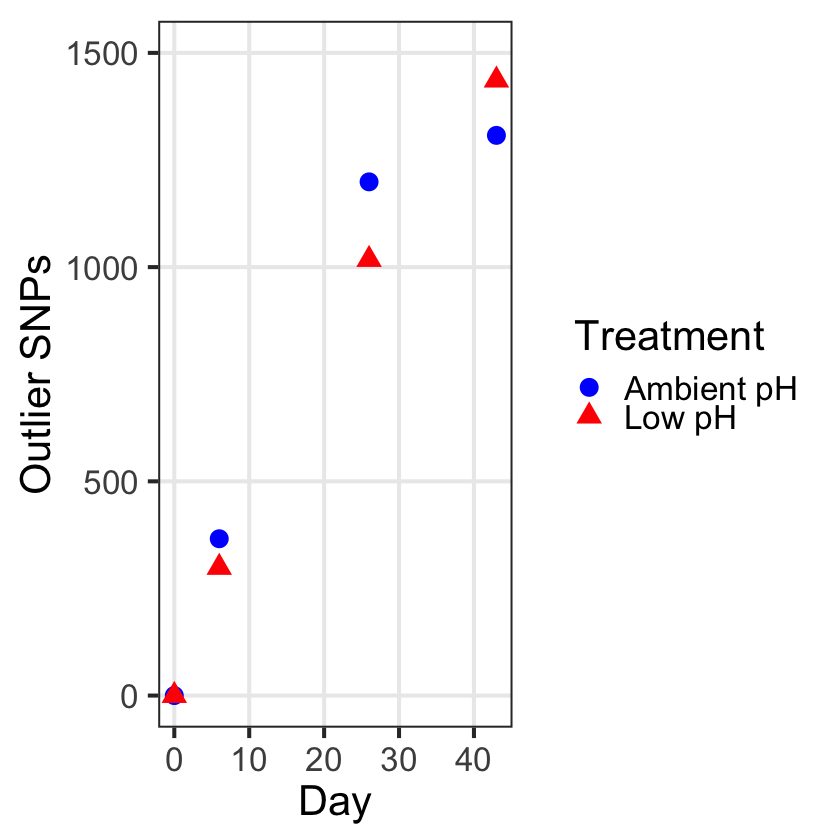

In [34]:
#For manuscript
#Plotting all selected loci on same plot (Figure 5a)

#turn Treatment to factor
selected_loci_fulldist$Treatment <- as.factor(selected_loci_fulldist$Treatment)
selected_loci_fulldist$Treatment <- revalue(selected_loci_fulldist$Treatment, c("Ambient"="Ambient pH"))
selected_loci_fulldist$Treatment <- revalue(selected_loci_fulldist$Treatment, c("Low"="Low pH"))

#Plot

selected_snps <- ggplot(selected_loci_fulldist , aes(x = Day, y = Corrected, colour = Treatment, shape = Treatment)) +
    geom_point(size = 5) +
    ylim(0, 1500)  +
    ylab("Outlier SNPs") +
    scale_colour_manual("Treatment", values = c("Ambient pH" = "blue", "Low pH" = "red")) +
    theme_bw(base_size = 25) +
    theme(panel.grid.minor = element_blank())

selected_snps + ggsave("~/Dropbox/U Chicago/Projects/France/DataAnalysis_Figures/PE3_Figures/outlier_snps.pdf")






Fst Results Analysis/Figure generation




Saving 7 x 7 in image


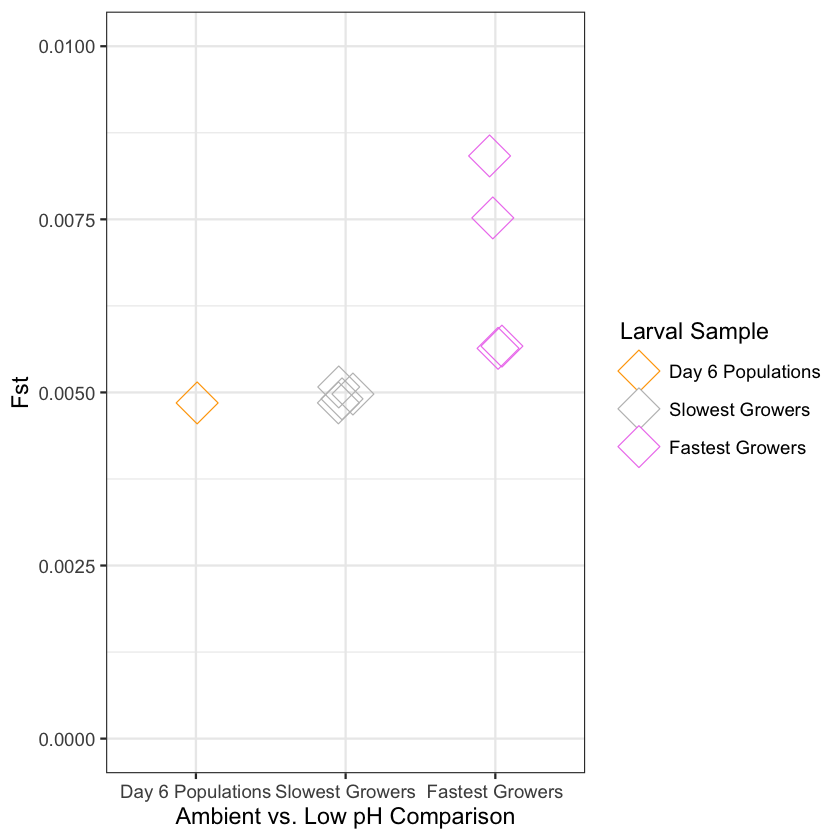

In [5]:
#Size Group Fst for manuscript (Figure S2)
D6_fst <- read.csv("./D6_Fst.csv")



D6_fst_plot <- ggplot(D6_fst, aes(x = Comparison, y = Fst)) +
    geom_jitter(size = 8, alpha = 1, shape = 5, aes(colour = factor(Comparison, levels =c("Day 6 Populations", "Slowest Growers", "Fastest Growers"))),
                position = position_jitter(width = 0.05, height = 0)) +
    xlab("Ambient vs. Low pH Comparison") +
    ylim(0, 0.01) +
    labs(color = "Larval Sample") +
    scale_colour_manual(values = c("Orange", "Grey", "Violet")) +
      theme(legend.position="none",
          axis.text=element_text(size = 30),
          axis.title=element_text(size=35, face = "bold")) +
    scale_x_discrete(limits=c("Day 6 Populations", "Slowest Growers", "Fastest Growers")) +
    theme_bw(base_size =14)

D6_fst_plot + ggsave("~/Dropbox/U Chicago/Projects/France/DataAnalysis_Figures/PE3_Figures/D6_fst_plot.pdf")

In [5]:
##For manuscript, Fst throughout the experiment
#First, remove Day 0 sample
Full_fst <- read.csv("./FullDstbn_Fst.csv")
Full_fst$Treatment <- revalue(Full_fst$Treatment, c("Ambient"="Ambient pH"))
Full_fst$Treatment <- revalue(Full_fst$Treatment, c("Low"="Low pH"))

##Find mean Fst for each treatment on final day
#Ambient
(0.012 + .0076)/2 #.0098; use as slope for linear ambient pH line
.0098/43 # 0.00023 divde by duration of treatment exposure and use as slope for linear ambient pH line
#Low
(.008 + .0073 + .010)/3 #.0084; use as slope for linear low pH line
.0084/43 #0.00020 ivde by duration of treatment exposure and use as slope for linear low pH line


p <- ggplot(Full_fst, aes(x = Day, y = Fst, colour = factor(Treatment, levels=c("Ambient pH", "Low pH")), shape = Treatment)) +
    geom_point(size = 5) +
    ylim(0, 0.015) +
    xlim(0, 45) +
    scale_colour_manual("Treatment", values = c("Ambient pH" = "blue", "Low pH" = "red", "Embryos" = "black")) +
    theme_bw(base_size = 25) +
    theme(panel.grid.minor = element_blank())

p <- ggsave("../PE3_Figures/full_fst.pdf")

[1] 0.0098

[1] 0.000227907

[1] 0.008433333

[1] 0.0001953488

Saving 7 x 7 in image




Creating final Venn Diagrams for ambient and low pH outlier loci from both full distribution and size selected SNPs


Saving 7 x 7 in image


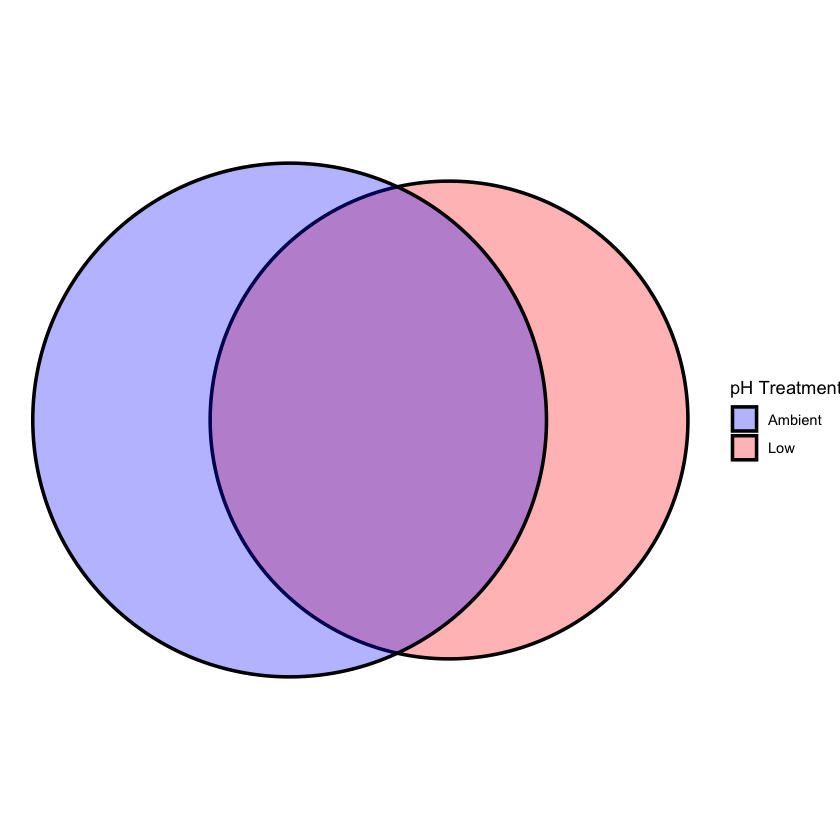

In [2]:
#Amb vs. Low pH loci venn diagram for manuscript (figure 6a)

#Read in simulated data
amb_low_loci <- read.csv("./Amb_Low_Size_Venn_simulation.csv")

#Create dataframe of x,y coordinates for circles
df.venn <- data.frame(x = c((1.07 * .58), 0), #offset circles from origin according to percentage of unique variation and scaled to total area
                     y = c(0, 0),
                     labels = c('Low', 'Ambient'))

amb_low_venn <- ggplot(df.venn, aes(x0 = x, y0 = y, r = c(.93, 1.0), fill = labels)) +
    geom_circle(alpha = 0.3, size = 1, colour = 'black') +
        coord_fixed() +
            theme_void() +
    scale_fill_manual(values = c("blue", "red")) +
    scale_colour_manual(values = c("blue", "red")) +
    guides(fill=guide_legend(title="pH Treatment"))

amb_low_venn + ggsave("../PE3_Figures/amb_low_venn.pdf")

Saving 7 x 7 in image


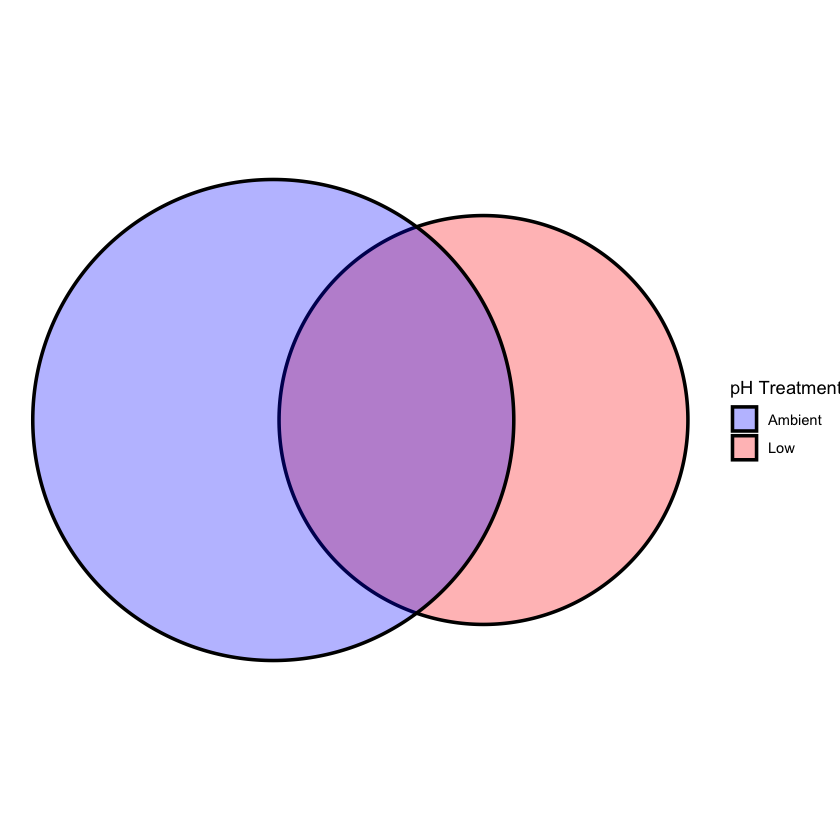

In [6]:
#Amb vs. Low pH size loci venn for manuscript (figure 6b)

#Create dataframe of x,y coordinates for circles
df.venn <- data.frame(x = c((1.15 * .76), 0),
                     y = c(0, 0),
                     labels = c('Low', 'Ambient'))

amb_low_size_venn <- ggplot(df.venn, aes(x0 = x, y0 = y, r = c(0.85, 1), fill = labels)) +
    geom_circle(alpha = 0.3, size = 1, colour = 'black') +
        coord_fixed() +
            theme_void() +
    scale_fill_manual(values = c("blue", "red")) +
    scale_colour_manual(values = c("blue", "red")) +
    guides(fill=guide_legend(title="pH Treatment"))

amb_low_size_venn + ggsave("../PE3_Figures/amb_low_size_venn.pdf")